<a href="https://colab.research.google.com/github/chowdhurymoontaha/soft_ComputerLab/blob/main/170104099.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset Loading, Reading and Preprocessing

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SC_Assignments/Assignment_3_SoftComp/Dataset 1.csv',encoding="latin1")
data.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
data['label'].value_counts()

0    8000
1    2314
Name: label, dtype: int64

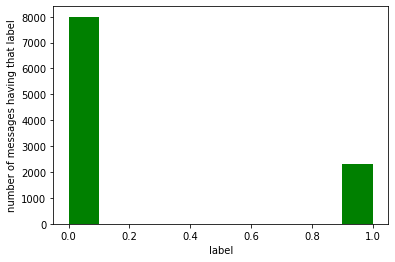

In [5]:
plt.hist(data['label'],facecolor='g')
plt.xlabel("label")
plt.ylabel("number of messages having that label")
plt.show()

In [6]:
data["length"]=data["message"].apply(len)
data.head(5)

,message,label,length
0,just had a real good moment. i missssssssss hi...,0,57
1,is reading manga http://plurk.com/p/mzp1e,0,42
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84
3,@lapcat Need to send 'em to my accountant tomo...,0,135
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45


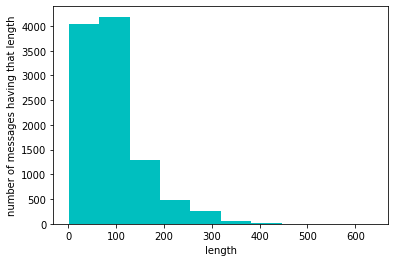

In [7]:
plt.hist(data['length'],facecolor='c')
plt.xlabel("length")
plt.ylabel("number of messages having that length")
plt.show()

In [8]:
nltk.download('stopwords')
stop=stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
def stop_words(df):
    df['stopwords'] = df['message'].apply(lambda x: len([x for x in x.split() if x in stop]))
    print(df[['message','stopwords']].head())

def webAddressRemove(df):  
    df['message'] = df['message'].apply(lambda x: " ".join(x for x in x.split() if (x[0] != '@') & ('http' not in x)& ('.com' not in x) & ('re:' not in x)))
    print(df['message'].head())

def RemovePunctuation(df):
    df['message'] = df['message'].str.replace('[^\w\s]','')
    print(df['message'].head())

In [11]:
stop_words(data)

                                             message  stopwords
0  just had a real good moment. i missssssssss hi...          6
1         is reading manga  http://plurk.com/p/mzp1e          1
2  @comeagainjen http://twitpic.com/2y2lx - http:...          0
3  @lapcat Need to send 'em to my accountant tomo...          7
4      ADD ME ON MYSPACE!!!  myspace.com/LookThunder          0


In [12]:
webAddressRemove(data)

0    just had a real good moment. i missssssssss hi...
1                                     is reading manga
2                                                    -
3    Need to send 'em to my accountant tomorrow. Od...
4                                 ADD ME ON MYSPACE!!!
Name: message, dtype: object


In [13]:
RemovePunctuation(data)

0    just had a real good moment i missssssssss him...
1                                     is reading manga
2                                                     
3    Need to send em to my accountant tomorrow Oddl...
4                                    ADD ME ON MYSPACE
Name: message, dtype: object


In [14]:
freq = pd.Series(' '.join(data['message']).split()).value_counts()[:20]
freq

to            3758
the           3448
a             2949
I             2839
and           2574
you           2143
depression    1807
of            1778
my            1705
is            1659
for           1594
in            1459
it            1453
i             1174
with          1103
on            1020
that          1017
me             986
have           886
so             796
dtype: int64

In [15]:
freq = pd.Series(' '.join(data['message']).split()).value_counts()[:6]
againFreq=pd.Series(' '.join(data['message']).split()).value_counts()[8:11]
freq

to     3758
the    3448
a      2949
I      2839
and    2574
you    2143
dtype: int64

In [16]:
againFreq=list(againFreq.index)

In [17]:
freq = list(freq.index)
freq.extend(againFreq)
freq

['to', 'the', 'a', 'I', 'and', 'you', 'my', 'is', 'for']

In [18]:
#Removing the most frequent words from the dataset
def frequent_words_removal(df):  
    df['message'] = df['message'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    print(df['message'].head(10))

In [19]:
frequent_words_removal(data)

0    just had real good moment i missssssssss him s...
1                                        reading manga
2                                                     
3    Need send em accountant tomorrow Oddly wasnt e...
4                                    ADD ME ON MYSPACE
5                  so sleepy good times tonight though
6    nbn as someone already said does fiber home me...
7                    23 or 24ÃÂÂ½C possible today Nice
8                 nite twitterville workout in am ciao
9                            Night darlin Sweet dreams
Name: message, dtype: object


In [20]:
stop_words(data)

                                             message  stopwords
0  just had real good moment i missssssssss him s...          5
1                                      reading manga          0
2                                                             0
3  Need send em accountant tomorrow Oddly wasnt e...          1
4                                  ADD ME ON MYSPACE          0


In [22]:
stemmer=PorterStemmer()

corpus=[]
for i in range(len(data)):
    #replacing everything other than alphabets with a space
    message=re.sub("[^a-zA-Z]"," ",str(data["message"][i]))
    #Lowering the tweets
    message=message.lower()
    #Converting in a list
    message=message.split()
    #Finding and removing stopwords
    message=[stemmer.stem(word) for word in message if not word in set(stopwords.words("english"))]
    #Joining after removal of stopwords
    message=" ".join(message)
    corpus.append(message)

In [23]:
corpus[:20]

['real good moment missssssssss much',
 'read manga',
 '',
 'need send em account tomorrow oddli wasnt even refer tax support evid though',
 'add myspac',
 'sleepi good time tonight though',
 'nbn someon alreadi said fiber home mean least regular',
 'c possibl today nice',
 'nite twittervil workout ciao',
 'night darlin sweet dream',
 'good morn everybodi',
 'final creat wordpress blog there alreadi blog seattl coffe commun',
 'kisha cnt get u til get frm u rememb ur top',
 'ye rememb band awesom pleas repli',
 'realli love reflect shadow',
 'ooo fantasi like fantasi novel check',
 'prob sell noth blog ill get listen band itun',
 'quotnokla connect peoplequot',
 'stay late start earli good thing like job',
 'read new job congratul that fantast']

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv=TfidfVectorizer()
X=tfv.fit_transform(corpus).toarray()
y=data["label"]

In [25]:
vocab_size = 6500

#one hot encoding
one_hot_dir = [one_hot(words,vocab_size) for words in corpus]

#length of all rows should be equal therefore applying padding
#this will adjust size by adding 0 at staring of the shorter rows
embedded_layer = pad_sequences(one_hot_dir,padding = 'pre')
embedded_layer

array([[   0,    0,    0, ..., 3595,  421,  593],
       [   0,    0,    0, ...,    0, 5778, 3729],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 4492, 2973, 3363],
       [   0,    0,    0, ..., 4492, 3436, 4394],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [26]:
X = np.array(embedded_layer)
y = np.array(y)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

X_train.shape,y_train.shape

((8251, 50), (8251,))

In [28]:
X_test.shape,y_test.shape

((2063, 50), (2063,))

In [29]:
# create the model
embed_vec_length = 32
model = Sequential()
model.add(Embedding(vocab_size,embed_vec_length,input_length = len(X_train[0])))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            208000    
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 128)           16512     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 64)            32832     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 32)            8224      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 32)             0

In [30]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 8, batch_size = 128)

Epoch 1/8
65/65 [==============================] - 4s 19ms/step - loss: 0.4027 - accuracy: 0.8321 - val_loss: 0.0609 - val_accuracy: 0.9845
Epoch 2/8
65/65 [==============================] - 1s 12ms/step - loss: 0.0325 - accuracy: 0.9914 - val_loss: 0.0535 - val_accuracy: 0.9879
Epoch 3/8
65/65 [==============================] - 1s 11ms/step - loss: 0.0111 - accuracy: 0.9978 - val_loss: 0.0692 - val_accuracy: 0.9859
Epoch 4/8
65/65 [==============================] - 1s 11ms/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.0749 - val_accuracy: 0.9850
Epoch 5/8
65/65 [==============================] - 1s 11ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0784 - val_accuracy: 0.9850
Epoch 6/8
65/65 [==============================] - 1s 11ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0839 - val_accuracy: 0.9855
Epoch 7/8
65/65 [==============================] - 1s 11ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.1011 - val_accuracy: 0.9855
Epoch 8/8
65/65 [===

In [31]:
model.save('/content/')

INFO:tensorflow:Assets written to: /content/assets


In [32]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epoch")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

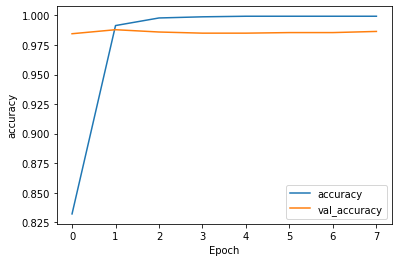

In [33]:
plot_graphs(history, "accuracy")

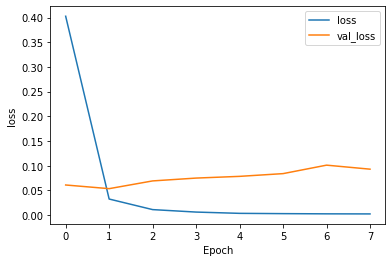

In [34]:
plot_graphs(history, "loss")

In [35]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [36]:
len(y_pred)

2063

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1588,    6],
       [  22,  447]])

In [38]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test,y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,y_pred)
print('F1 score: %f' % f1)

# confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

Accuracy: 0.986428
Precision: 0.986755
Recall: 0.953092
F1 score: 0.969631
[[1588    6]
 [  22  447]]


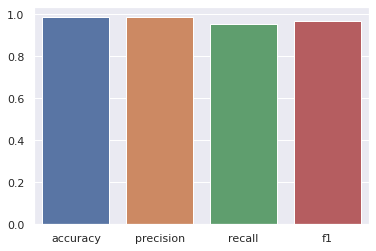

In [39]:
import seaborn as sns
sns.set()
scores = ['accuracy','precision','recall','f1']
values = [accuracy,precision,recall,f1]
sns.barplot(x=scores,y=values)

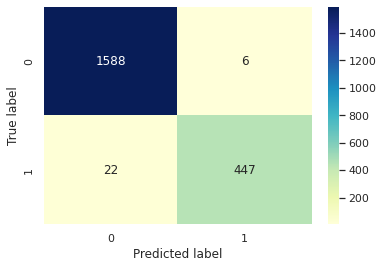

In [40]:
sns.heatmap(matrix, annot=True, fmt="d", cmap ="YlGnBu") # font size
plt.xlabel("Predicted label") 
plt.ylabel("True label") 
plt.show()

In [43]:
import tensorflow as tf
def predict_sentiment(text):
  review=re.sub("[^a-zA-Z]"," ",str(text))
  #Lowering the tweets
  review=review.lower()
  #Converting in a list
  review=review.split()
  #Finding and removing stopwords
  review=[stemmer.stem(word) for word in review if not word in set(stopwords.words("english"))]
  #Joining after removal of stopwords
  review=" ".join(review)
  # print("here===",review)
  one_hot_dir = [one_hot(words,vocab_size) for words in [review]]

  #length of all rows should be equal therefore applying padding
  #this will adjust size by adding 0 at staring of the shorter rows
  embedded_layer = pad_sequences(one_hot_dir,padding = 'pre')
  
  embedded_layer = np.array(embedded_layer)
  output = model(embedded_layer)
  prediction = output.numpy()
  prediction = prediction[0][0]
  print(prediction)
  
  if prediction > 0.5:
    print(f'{prediction:0.3}: Label 1')
    return 1
  else:
    print(f'{prediction:0.3}: Label 0')
    return 0

In [ ]:
TextTest = "I really love reflections and shadows"
predict_sentiment(TextTest)